In [25]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
class NaiveBayesclassifier:
    def __init__(self):
        self.class_probabilities={}
        self.feature_probabilities={}
    def fit(self,x,y):
        n_samples,n_features=x.shape
        classes=np.unique(y)
        for class_label in classes:
            class_indices=np.where(y==class_label)
            class_probability=len(class_indices[0])/n_samples
            self.class_probabilities[class_label]=class_probability
            class_data=x[class_indices]
            feature_probabilities={}
            for feature in range(n_features):
                unique_values,counts=np.unique(class_data[:,feature],return_counts=True)
                feature_probabilities[feature]={'value':unique_values,'probabilities':counts/len(class_indices[0])}
            self.feature_probabilities[class_label]=feature_probabilities
    def predict(self,x):
        predictons=[]
        for sample in x:
            max_prob=-1
            predicted_class=None
            for class_label,class_probability in self.class_probabilities.items():
                posterior=class_probability
                for feature,feature_value in enumerate(sample):
                    if feature_value in self.feature_probabilities[class_label][feature]['value']:
                        feature_probability_index=np.where(self.feature_probabilities[class_label][feature]['value']==feature_value)[0][0]
                        feature_probability=self.feature_probabilities[class_label][feature]['probabilities'][feature_probability_index]
                        posterior*=feature_probability
                    else:
                        posterior*=0.01
                if posterior>max_prob:
                    max_prob=posterior
                    predicted_class=class_label
            predictons.append(predicted_class)
        return predictons
    
def evaluate_naive_bayes(dataset,target_col,K_values):
    for K in K_values:
        print(f"\nResults for K={K}")
        x_train,x_test,y_train,y_test=train_test_split(dataset.drop(columns=[target_col]),dataset[target_col],test_size=(1-K/10),random_state=42)
        Clf=NaiveBayesclassifier()
        Clf.fit(x_train.values,y_train.values)
        y_pred=Clf.predict(x_test.values)
        accuracy=accuracy_score(y_test,y_pred)
        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, cmap='Blues')
        plt.show()
        print(f"Split {K*10}-{100-K*10} Accuracy:{accuracy:.2f}")

In [27]:
iris_data=pd.read_csv('iris.csv')
titanic_data=pd.read_csv('titanic.csv')

In [28]:
titanic_data=titanic_data.drop(columns=['PassengerId','Name','Ticket','Cabin'])
titanic_data['Age'].fillna(titanic_data['Age'].median(),inplace=True)
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0],inplace=True)
titanic_data=pd.get_dummies(titanic_data,columns=['Sex','Embarked'])
titanic_data.head(6)

C:\Users\beana\AppData\Local\Temp\ipykernel_12844\290382382.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['Age'].fillna(titanic_data['Age'].median(),inplace=True)
C:\Users\beana\AppData\Local\Temp\ipykernel_12844\290382382.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves 

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,False,True,False,False,True
1,1,1,38.0,1,0,71.2833,True,False,True,False,False
2,1,3,26.0,0,0,7.9250,True,False,False,False,True
3,1,1,35.0,1,0,53.1000,True,False,False,False,True
4,0,3,35.0,0,0,8.0500,False,True,False,False,True
5,0,3,28.0,0,0,8.4583,False,True,False,True,False


<Axes: >

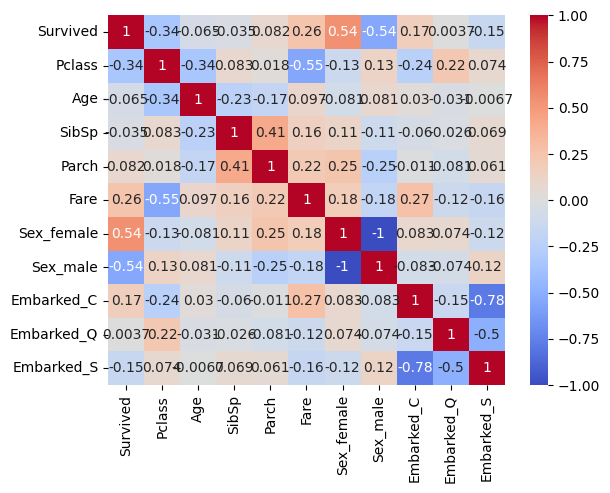

In [29]:
correlation_matrix = titanic_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

Iris Dataset Naive Bayes Classifier Results

Results for K=3


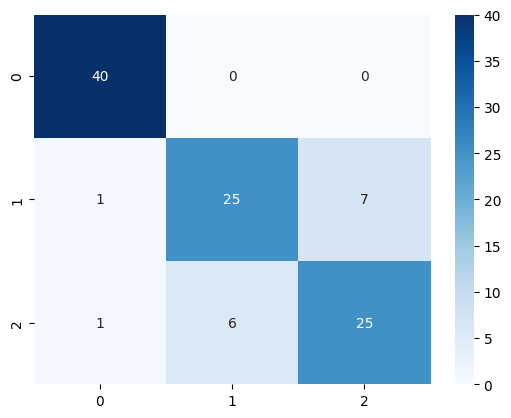

Split 30-70 Accuracy:0.86

Results for K=5


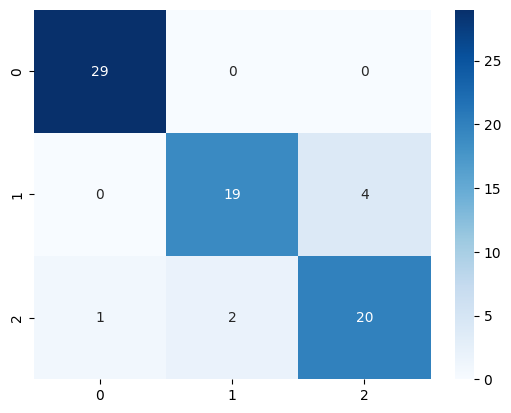

Split 50-50 Accuracy:0.91

Results for K=7


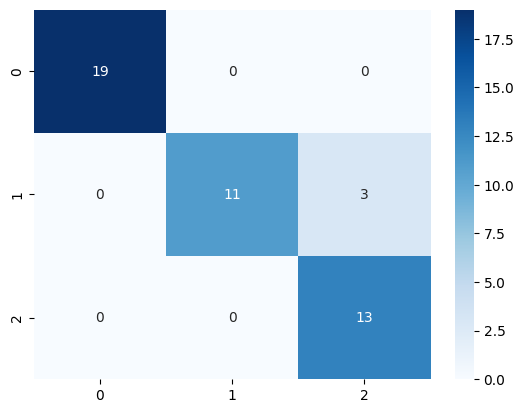

Split 70-30 Accuracy:0.93

Results for K=9


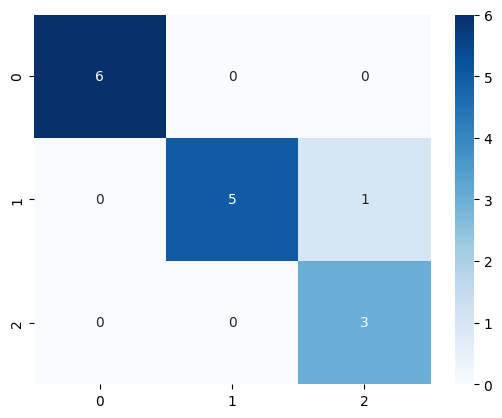

Split 90-10 Accuracy:0.93


In [30]:
print("Iris Dataset Naive Bayes Classifier Results")
evaluate_naive_bayes(iris_data,'Species',[3,5,7,9])


Titanic dataset Naive Bayes Classifier Results: 

Results for K=3


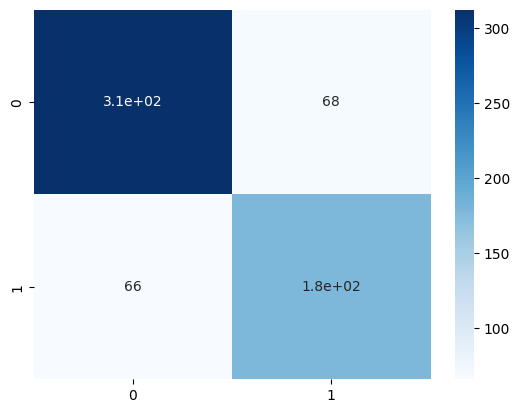

Split 30-70 Accuracy:0.79

Results for K=5


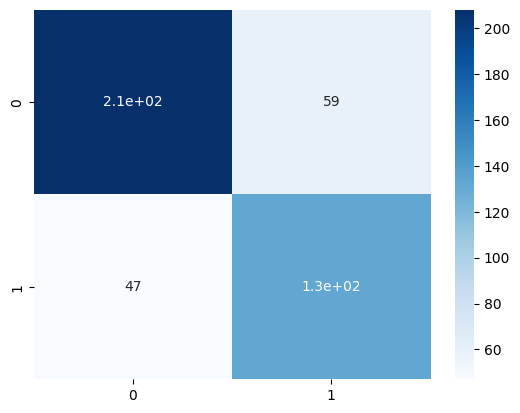

Split 50-50 Accuracy:0.76

Results for K=7


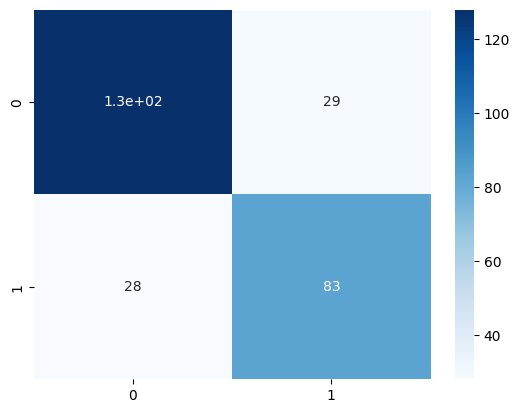

Split 70-30 Accuracy:0.79

Results for K=9


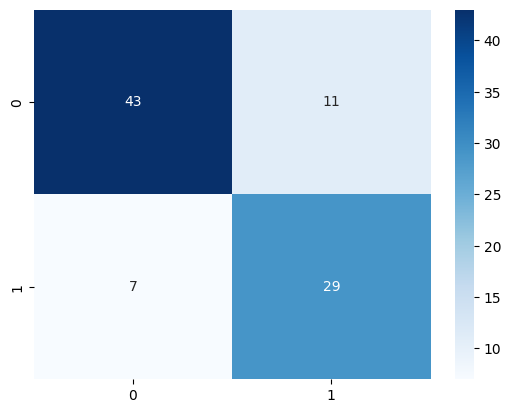

Split 90-10 Accuracy:0.80


In [31]:
print("\nTitanic dataset Naive Bayes Classifier Results: ")
evaluate_naive_bayes(titanic_data,'Survived',[3,5,7,9])